# Credit card Data - Analysis

# Business/Domain Understanding


### Context:

    Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic   growth by facilitating the channeling of saving decisions into productive investment.
    A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks.
    A bank's profit or a loss depends to a large extent on loans i.e. whether th customers are paying back the loan or defaulting.
    Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc..
    It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").
    By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important.
    Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage
    between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities. Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous
    data.

### What is Credit Risk?

    Credit risk refers to the likelihood that a borrower will fail to meet their obligations
    in repaying a debt. In other words, it's the risk that a borrower might default on a
    loan or be unable to meet their contractual obligations, resulting in financial loss
    for the lender.
    Managing and assessing credit risk is a crucial aspect of financial management
    for both lenders and borrowers. Lenders employ various tools and models, like
    credit scoring systems, to evaluate and mitigate credit risk. Borrowers, on the
    other hand, seek to maintain good creditworthiness to secure favorable lending
    terms and opportunities

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# import os
# # Mount Google Drive
# drive.mount('/content/drive')

# # After mounting, you can access your files using the local path within the drive directory.
# # For example, if your file is located in a directory called "My Folder" in your Drive:

# drive_path = 'https://drive.google.com/file/d/1IUPtWMW4h97ZJHEFYIM1j5dHZqqBQG0h/view?usp=drive_link'  # Adjust the path accordingly
# os.listdir(drive_path)



In [ ]:
df=pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [ ]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [ ]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=32581, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
x=df.isnull().sum()
y=(df.isnull().sum())/len(df)*100
z={"Percentage of missing values:\n":y}
print(z)

{'Percentage of missing values:\n': person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64}


Observation:

There are two Missing value columns

    1.Person_emp_length - 895
    2.Loan_int_rate     - 3116

In [ ]:
df.shape

(32581, 12)

In [ ]:
# Treating Missing Values

# df['person_emp_length'].
df.dropna(inplace=True)



Observation:

  - There were two columns having an outliers, for better insites of data we have drop the rows of missing values
  - Before Droping the data shape was (32581,12) and after droping rows shape we get (28638,12)

In [ ]:
df.shape



(28638, 12)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31947,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [ ]:
df.duplicated().sum()

137

Observation:
  
  - There are 137 duplicated data in a dataset,if we won't drop it will occur Data Redundancy,Misleading Insights,In Accurate statistics.



In [ ]:
df.shape

(28638, 12)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(28501, 12)

Observation:
    
   - There are 137 duplicated data in a dataset,if we won't drop it will occur Data Redundancy,Misleading Insights,In Accurate statistics.
   - Before droping the shape was (28638, 12) and droping it and we get (28501, 12) we have drop the 165 duplicated data

In [ ]:
df.duplicated().sum()

0

In [ ]:
def contineous_data(num_data):

    for num_col in num_data:
        print("-"*10,num_col , "-"*10)
        print(num_data[num_col].agg(['min','max','mean','median','std','skew','kurt']))
        print()
num_data=df.select_dtypes(int,float)

In [ ]:
contineous_data(num_data)

---------- person_age ----------
min        20.000000
max       144.000000
mean       27.738676
median     26.000000
std         6.316166
skew        2.563895
kurt       18.717590
Name: person_age, dtype: float64

---------- person_income ----------
min       4.000000e+03
max       6.000000e+06
mean      6.665441e+04
median    5.600000e+04
std       6.237603e+04
skew      3.530272e+01
kurt      2.966352e+03
Name: person_income, dtype: float64

---------- loan_amnt ----------
min         500.000000
max       35000.000000
mean       9658.533034
median     8000.000000
std        6329.604672
skew          1.174138
kurt          1.348571
Name: loan_amnt, dtype: float64

---------- loan_status ----------
min       0.000000
max       1.000000
mean      0.217115
median    0.000000
std       0.412289
skew      1.372361
kurt     -0.116633
Name: loan_status, dtype: float64

---------- cb_person_cred_hist_length ----------
min        2.000000
max       30.000000
mean       5.800498
median     4.00

 -----------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
Observation:

   - person_age
       
       - Many of the person age fall in 20 to 144.
       - Average age of an person is 27.
       - Data is Distributed in positively skew .
       - By seeing the kurt we can say that there are outliers.
   ---------------------------------------------------------------------------------    
   - person_income
  
       - Many of the person income fall in 4000 to 6000000
       - Average income of an person is 66074.84846996715
       - Data is Distributed in positively skew.
       - By seeing the kurt we can say that there are outliers  
       
   --------------------------------------------------------------------------------   
   - Loan amount
  
      - Many of the person loan amount fall in 500 to 35000
      - Average loan amount of an person is 9589
      - Data is Distributed in positively skew.
      - By seeing the kurt we can say that there are outliers
       
    

In [ ]:
def discrete_data(cat_data):

    for col_name in cat_data:
        print("-"*10,col_name,10*"-")

        print(cat_data[col_name].agg(["unique","nunique"]))
        print(cat_data[col_name].value_counts())

        print()

discrete= df.select_dtypes(object)

In [ ]:
discrete_data(discrete)

---------- person_home_ownership ----------
unique     [RENT, OWN, MORTGAGE, OTHER]
nunique                               4
Name: person_home_ownership, dtype: object
RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: person_home_ownership, dtype: int64

---------- loan_intent ----------
unique     [PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...
nunique                                                    6
Name: loan_intent, dtype: object
EDUCATION            5670
MEDICAL              5269
VENTURE              4969
PERSONAL             4859
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: loan_intent, dtype: int64

---------- loan_grade ----------
unique     [D, B, C, A, E, F, G]
nunique                        7
Name: loan_grade, dtype: object
A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: loan_grade, dtype: int64

---------- cb_person_default_on_file ----------
unique     [Y, N]
nunique         2
Name: cb_person_default

------------------------------------------------------------------------------------------
-------------------------------------------------------------

Observation:

   - person_home_ownership
      - There are 4 types of loan on House
        - person is asking a loan on Rent House
        - person is asking a loan on OWN house  
        - Person is asking a loan on Morage House
        - Person is asking a loan on Other House  
            
     - Most of the person are asking a loan on Rent and Mortgage house
 ------------------------------------------------------------------
   - loan_intent
       - There are 6 Types of loans on Intent they are
           - Personal Loan,
           - Education Loan,
           - Medical Loan,
           - Venture Loan,
           - Debtconsolidation loan,
           - Home Improment loan
         
 -------------------------------------------------------------------------------------
   - Loan Grade
       - There are 7 nunique grades
           A,B,C,D,E,F,G
 ----------------------------------------------------------------------------------------
   -  cb_person_default_on_file   
       - Person will default a payment or not
       - 5090 person were done default payment
       - 23411 person were not done any defalut payment


In [ ]:
g=df.groupby('loan_status')

In [ ]:
g.first()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
loan_status,,,,,,,,,,,
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3


In [ ]:
g['person_age'].head()

0     22
1     21
2     25
3     23
4     24
5     21
14    23
15    23
16    23
20    25
Name: person_age, dtype: int64

In [ ]:
g['person_home_ownership'].value_counts()

loan_status  person_home_ownership
0            MORTGAGE                 10253
             RENT                      9965
             OWN                       2029
             OTHER                       66
1            RENT                      4533
             MORTGAGE                  1483
             OWN                        145
             OTHER                       27
Name: person_home_ownership, dtype: int64

<Axes: xlabel='person_age', ylabel='Count'>

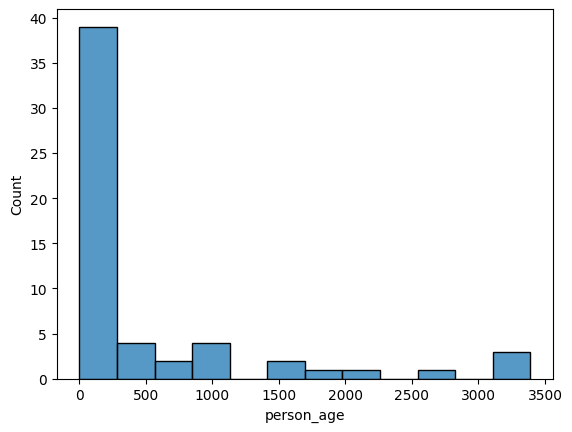

In [ ]:
sns.histplot(df['person_age'].value_counts())

In [ ]:
# Q1=df["person_income"].quantile(0.25)
# Q3=df["person_income"].quantile(0.75)
# IQR=Q3-Q1
# Lower=Q1-(1.5*IQR)
# Upper=Q3+(1.5*IQR)
# df[(df["person_income"]<Lower) | (df["person_income"]>Upper)]

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<Axes: title={'center': 'person_income'}>

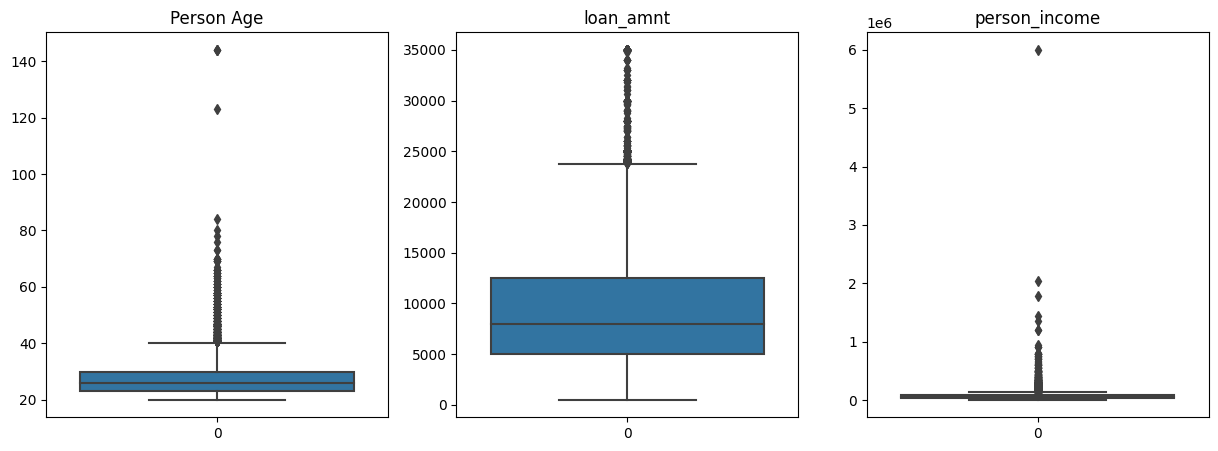

In [ ]:

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].set_title('Person Age')
sns.boxplot(df['person_age'], ax=axs[0])
axs[1].set_title('loan_amnt')
sns.boxplot(df['loan_amnt'], ax=axs[1])
axs[2].set_title('person_income')
sns.boxplot(df['person_income'],ax=axs[2])



In [ ]:
df.select_dtypes(int,float)

,person_age,person_income,loan_amnt,loan_status,cb_person_cred_hist_length
0,22,59000,35000,1,3
1,21,9600,1000,0,2
2,25,9600,5500,1,3
3,23,65500,35000,1,2
4,24,54400,35000,1,4
...,...,...,...,...,...
32576,57,53000,5800,0,30
32577,54,120000,17625,0,19
32578,65,76000,35000,1,28
32579,56,150000,15000,0,26


Data Cleaning and Ouliers

<Axes: title={'center': 'Before Removing Outliers'}, xlabel='person_emp_length', ylabel='Density'>

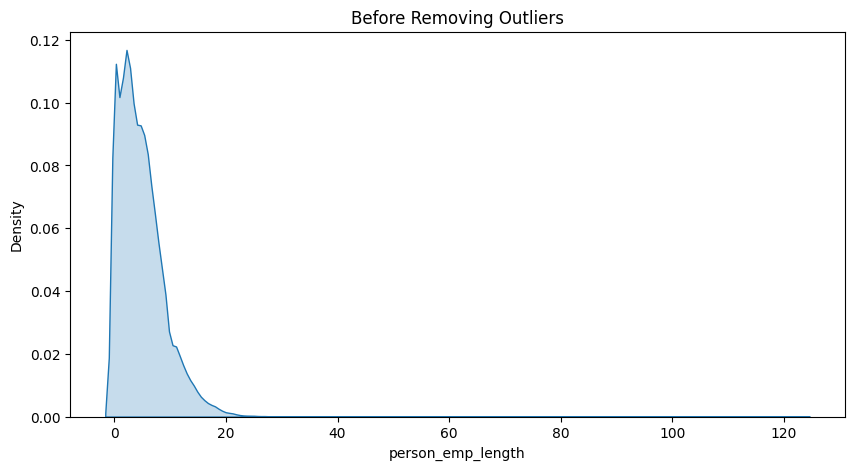

In [ ]:

fig, axs = plt.subplots(figsize=(10,5))
axs.set_title("Before Removing Outliers")
sns.kdeplot(df['person_emp_length'],fill=True)



Observation:

- The data is distributed till the 35 Person Employee length After that there are outliers.


In [ ]:
df['person_emp_length']<30

0        False
1         True
2         True
3         True
4         True
         ...  
32576     True
32577     True
32578     True
32579     True
32580     True
Name: person_emp_length, Length: 28501, dtype: bool

In [ ]:
df=df[df['person_emp_length']<30]

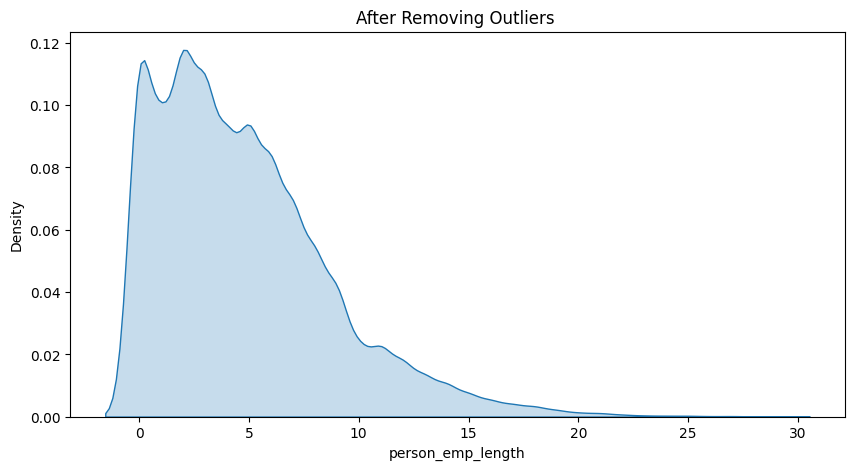

In [ ]:

fig, axs = plt.subplots(figsize=(10,5))
axs.set_title("After Removing Outliers ")
sns.kdeplot(df['person_emp_length'],fill=True)
plt.show()

---------- person_age ----------


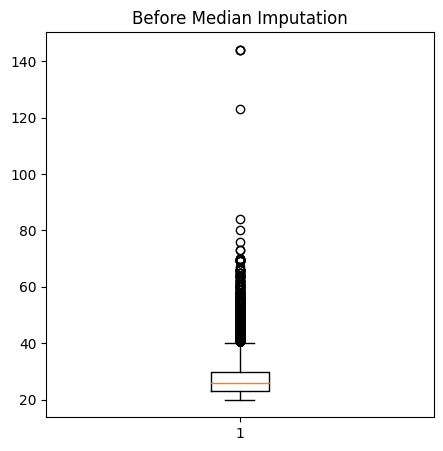

---------- cb_person_cred_hist_length ----------


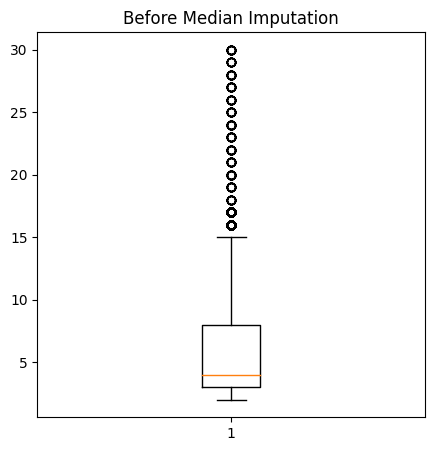

---------- loan_amnt ----------


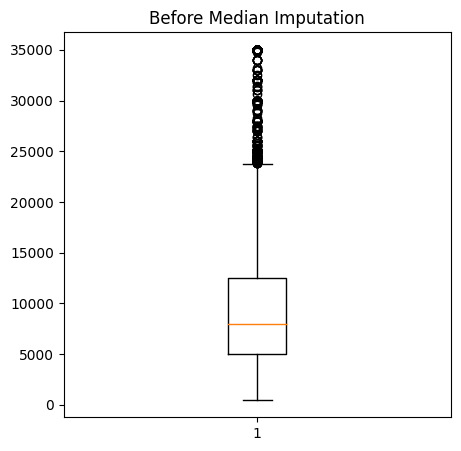

In [ ]:

def continuous_data(num_data,title):
    print("-" * 10, num_data.name, "-" * 10)

    fig, axs = plt.subplots(figsize=(5, 5))
    axs.boxplot(num_data)
    axs.set_title(title)
    plt.show()

continuous_data(df['person_age'],"Before Median Imputation")
continuous_data(df['cb_person_cred_hist_length'],"Before Median Imputation")
continuous_data(df['loan_amnt'],"Before Median Imputation")

In [ ]:
import pandas as pd
import numpy as np

def iqr_outlier_imputation(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[column.name] < lower_bound) | (df[column.name] > upper_bound), column.name] = np.median(column)

    return column

columns_to_impute =['person_age', "person_income", 'loan_amnt','cb_person_cred_hist_length']

for col in columns_to_impute:
    if col in df.columns:
        iqr_outlier_imputation(df[col])


df.to_csv('loan_analysis.csv', index=False)


In [ ]:
df1=pd.read_csv("/content/loan_analysis.csv")

---------- person_age ----------


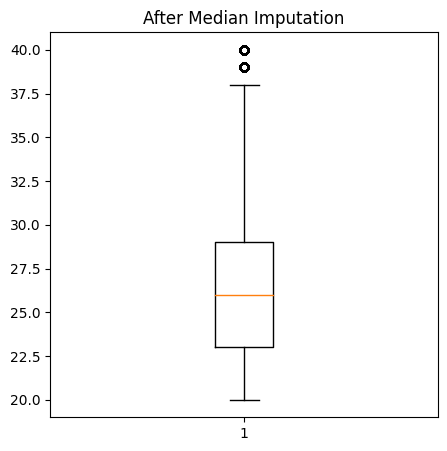

---------- cb_person_cred_hist_length ----------


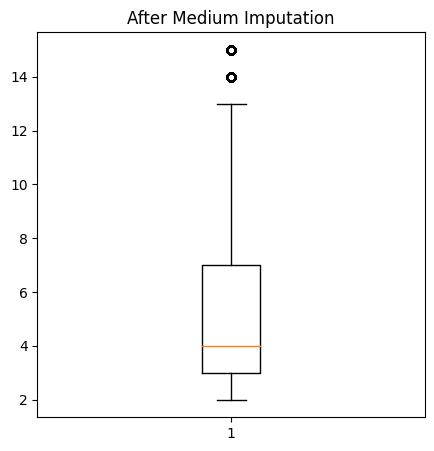

---------- loan_amnt ----------


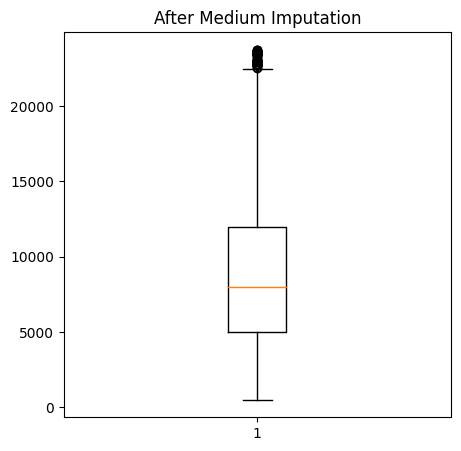

In [ ]:

def continuous_data(num_data,title):
    print("-" * 10, num_data.name, "-" * 10)

    fig, axs = plt.subplots(figsize=(5, 5))
    axs.boxplot(num_data)
    axs.set_title(title)
    plt.show()

continuous_data(df1['person_age'],"After Median Imputation")
continuous_data(df1['cb_person_cred_hist_length'],"After Medium Imputation")
continuous_data(df1['loan_amnt'],"After Medium Imputation")

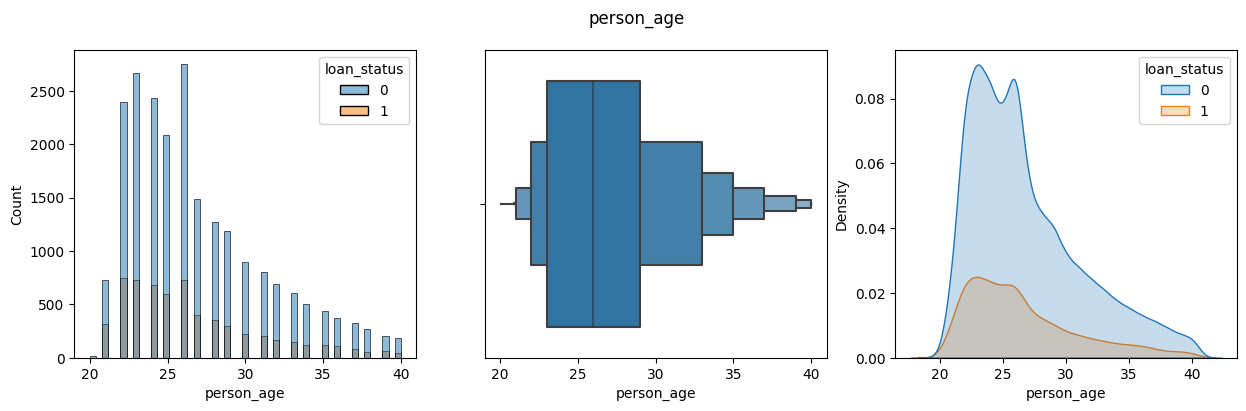

In [ ]:
def contineous_plot(data,title):
    fig,axs = plt.subplots(1,3,figsize = (15,4))
    fig.suptitle(title)
    # axs[0].set_title("Person Age")
    sns.histplot(data=df1,x=data,ax=axs[0],hue='loan_status')
    # axs[1].set_title("Person income")
    sns.boxenplot(data=df1,x=data,ax=axs[1])
    # axs[2].set_title("Loan Amount")
    sns.kdeplot(data=df1,x=data,fill=True,ax=axs[2],hue='loan_status')


contineous_plot("person_age","person_age")


Observation:

  - Right skew distribution
  - Data is Range from a 20 age to 144 age,but at the 144 only one person arises that are out tiers so we have done medum Imputation on it to overcome outlier

  - Probability of making default payment of an Age Between 20 to 28 more
  - As the Person Age increases the probality of making default is decreases.
  
- Proability of Default payment between Age 20 to 25 is less but Age 25 to 28 makes more Default Payment


- Lenders.com focus on marketing their credit Card to the oldes indir deal Age

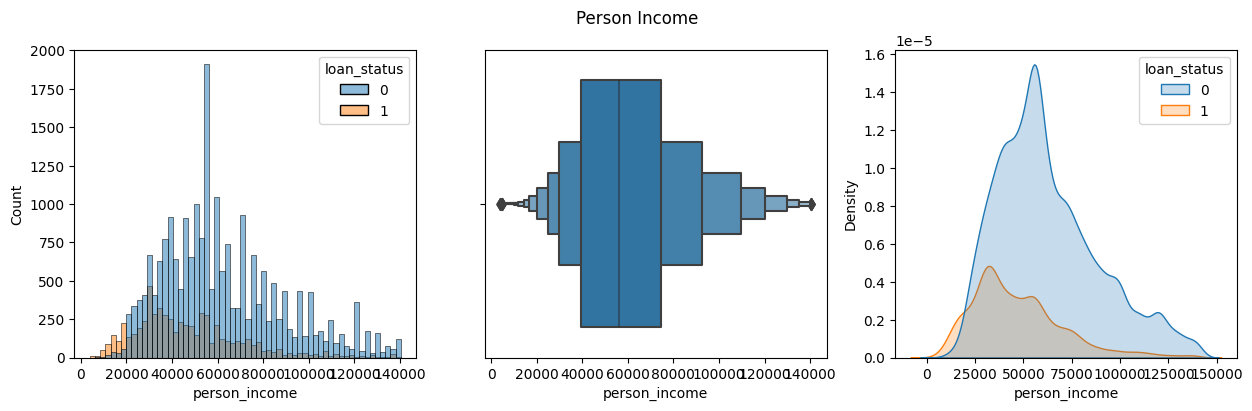

In [ ]:

contineous_plot('person_income','Person Income')



  - Data Ranges from 4000 to 60 lakhs but at the 60 laks only few peoples were there so we can say it is an outlier to overcome we have done median Imputation.


-  where most of the population are below & 2 Lakhs beyond them seams to be outlier

- The Borrows who has income from 25,000 to I Lakhas have Prob of getting more defaut.

- may their financial Cond" is not good for who where doing defaulters.

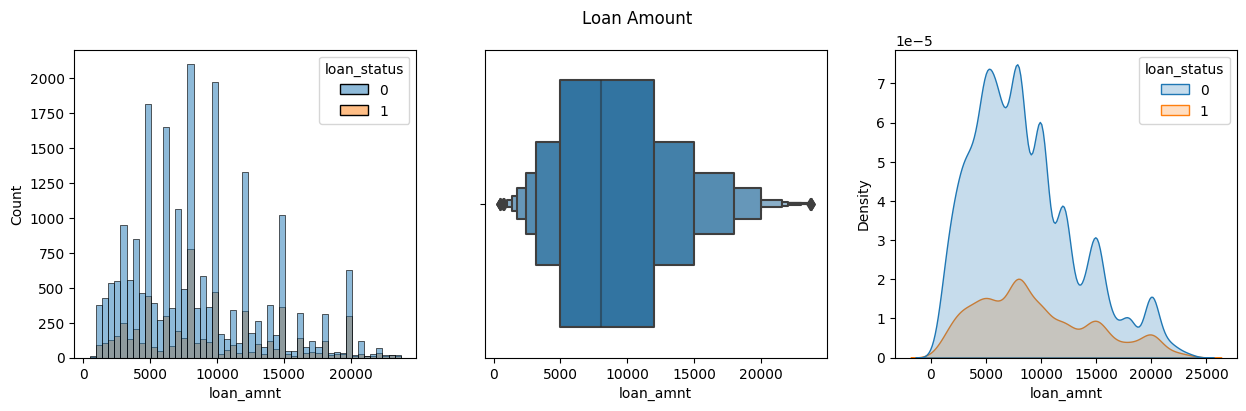

In [ ]:
contineous_plot("loan_amnt","Loan Amount")


 - If the Borrower is borring the loan amount From financial instute or banks as the loan amount get Higher the Probability of getting default is higher

 - Borrower who is taking low loan amount then the Probability of getting default is very high

- As the loan amount increases the probability of getting default gets decreases

Lenders:

 - As Borrowes who are taking medium loan amount from the financial institues or banks are facing the problems whilepaying the bills , whenever loans are paying may be check the financial situation so that loan will be not default.
  

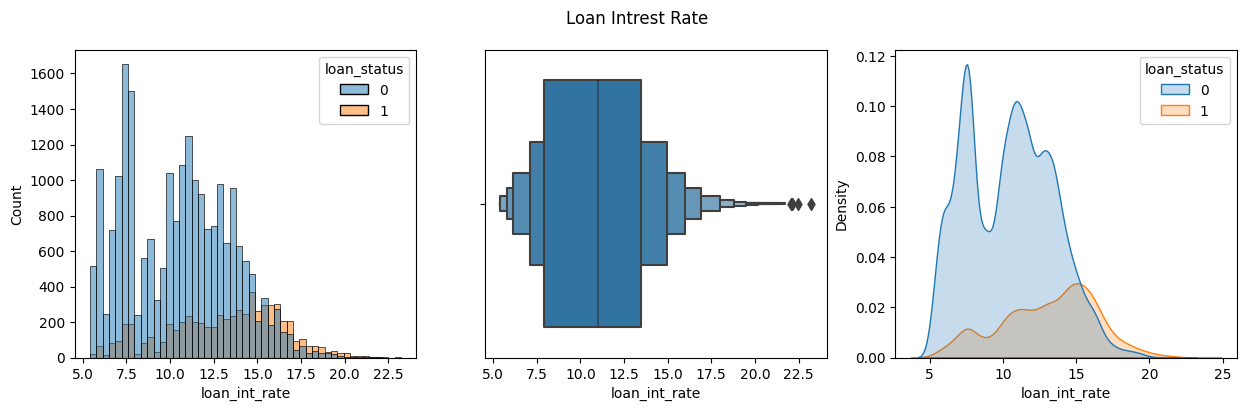

In [ ]:
contineous_plot("loan_int_rate",'Loan Intrest Rate')

-  Higher the intrest rate Probability of getting default is higher

- As the density of loan defaulter is higher amount borrows the intrest rate can be higher


-  The borrowers who are charged higher interest rate are struggling to repayment & defauding on the's credit card.

  What Lender should do:

 - Lender should carefully assess the credit worthiness of these application & offering lower loan intrest rate

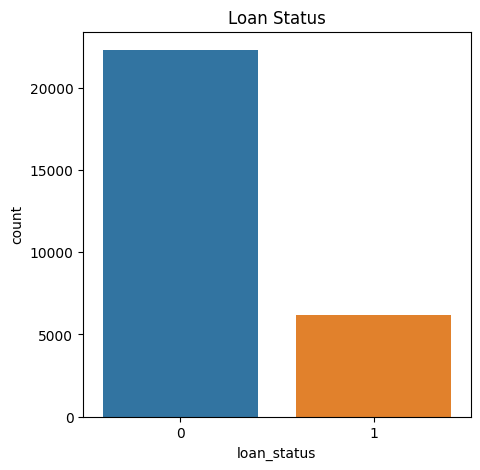

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_title("Loan Status")
sns.countplot(data=df1, x='loan_status', ax=ax)

plt.show()

Observation:


- Loan Status data is Bernoulli Distributed   

- The Probability getting Default loan Status is 22 %
- The Probability getting Non-Default loan Status is 78 %

<Axes: title={'center': 'cb_person_cred_hist_length'}, xlabel='cb_person_cred_hist_length', ylabel='count'>

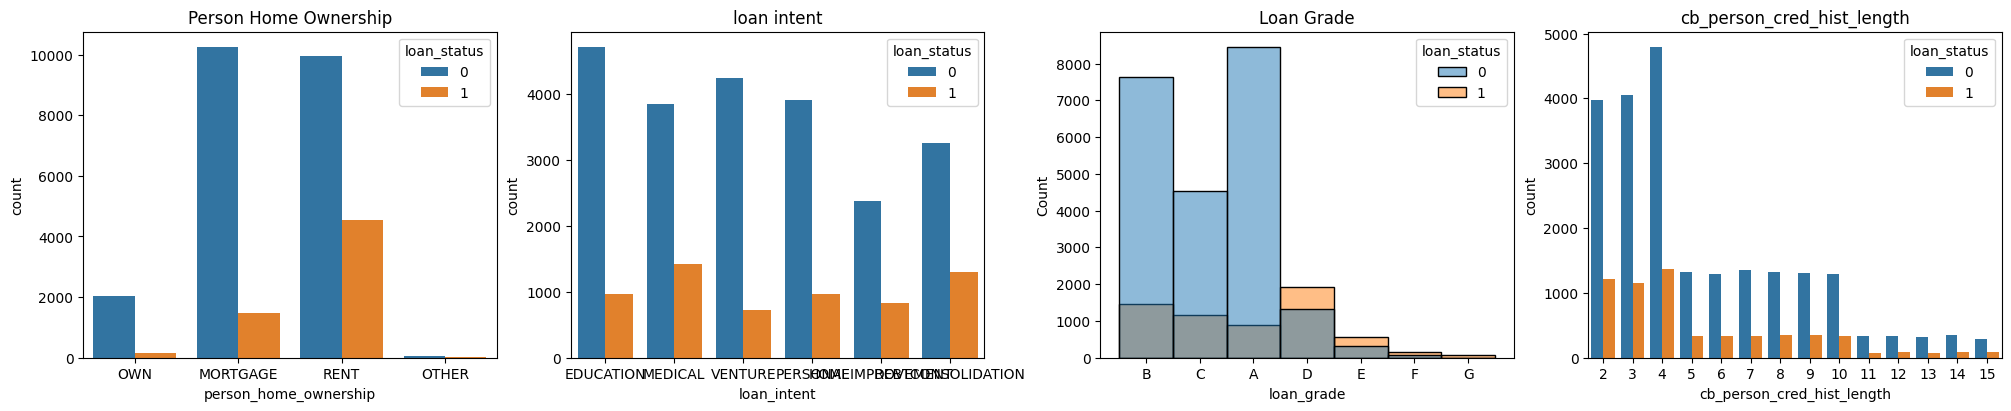

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,4),constrained_layout=True)

ax[0].set_title("Person Home Ownership")
sns.countplot(data=df1, x='person_home_ownership',hue='loan_status', ax=ax[0])

ax[1].set_title("loan intent")
sns.countplot(data=df1, x='loan_intent',hue='loan_status', ax=ax[1])
# ax[1].set_xticks(rotation=20)
# axs[1].legend()

ax[2].set_title('Loan Grade')
sns.histplot(data=df1,x='loan_grade',hue='loan_status',ax=ax[2])
# ax[2].set_xticks(rotation=20)

ax[3].set_title("cb_person_cred_hist_length")
sns.countplot(data=df1,x='cb_person_cred_hist_length',hue='loan_status',ax=ax[3])
# ax[2].set_xticks(rotation=20)

Observation:

- Person Home Owenership data is Binomial Distributed   

-  The Mortgage and Rent are the two columns that make non default payment
- Rent make more defalut payment than other

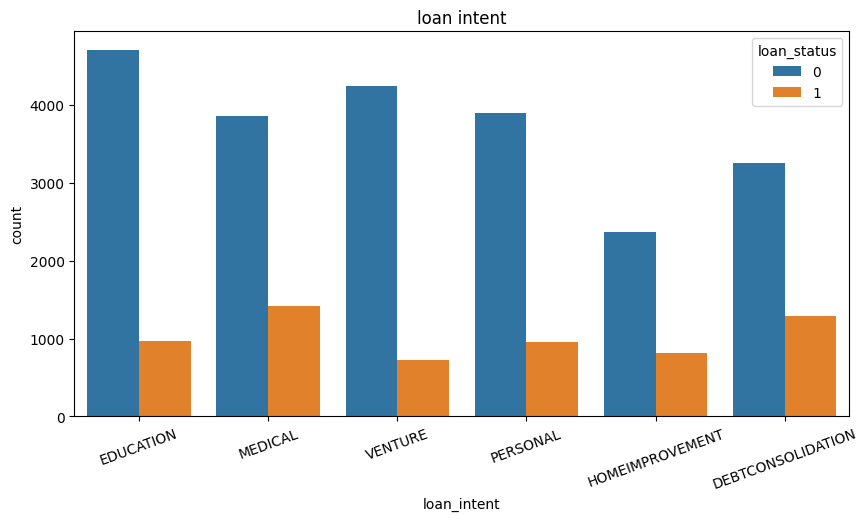

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title("loan intent")
sns.countplot(data=df1, x='loan_intent',hue='loan_status', ax=ax)
plt.xticks(rotation=20)
plt.show()

- In the loan intent the Medical and Debt Consolidataion make more amout of default

Lenders:

- In the Medical the borrowers are taking excess amout of loan and unable to pay loan because of financial situation

- In the Debconsolidation the Borrower who owns loans are unable to pay loan because of their financial issues

<Axes: title={'center': 'Loan Grade'}, xlabel='loan_grade', ylabel='Count'>

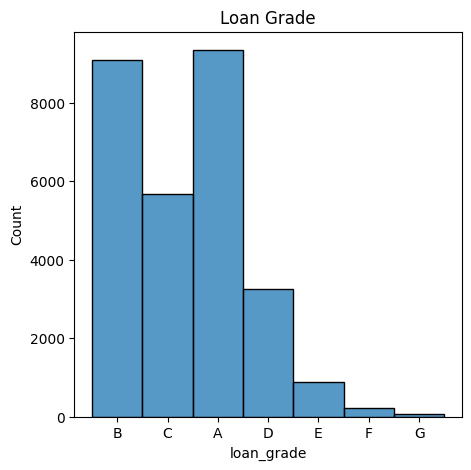

In [ ]:
fig,axs=plt.subplots(figsize=(5,5))
axs.set_title('Loan Grade')

sns.histplot(data=df1,x='loan_grade')

Observation:

- Probability of making non-default payment on loan_grade are A,B,C

- Probability of making default payment on loan grade are D,B,C,A

In [ ]:
df.corr()

<ipython-input-57-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.087571,0.173648,0.041301,0.011926,-0.030046,-0.040887,0.687309
person_income,0.087571,1.000000,0.183059,0.290082,-0.039643,-0.241838,-0.314661,0.061310
person_emp_length,0.173648,0.183059,1.000000,0.082851,-0.058644,-0.087411,-0.059528,0.148779
loan_amnt,0.041301,0.290082,0.082851,1.000000,0.081395,0.077312,0.547424,0.034848
loan_int_rate,0.011926,-0.039643,-0.058644,0.081395,1.000000,0.339928,0.123218,0.014600
loan_status,-0.030046,-0.241838,-0.087411,0.077312,0.339928,1.000000,0.379889,-0.023543
loan_percent_income,-0.040887,-0.314661,-0.059528,0.547424,0.123218,0.379889,1.000000,-0.026578
cb_person_cred_hist_length,0.687309,0.061310,0.148779,0.034848,0.014600,-0.023543,-0.026578,1.000000


<Axes: >

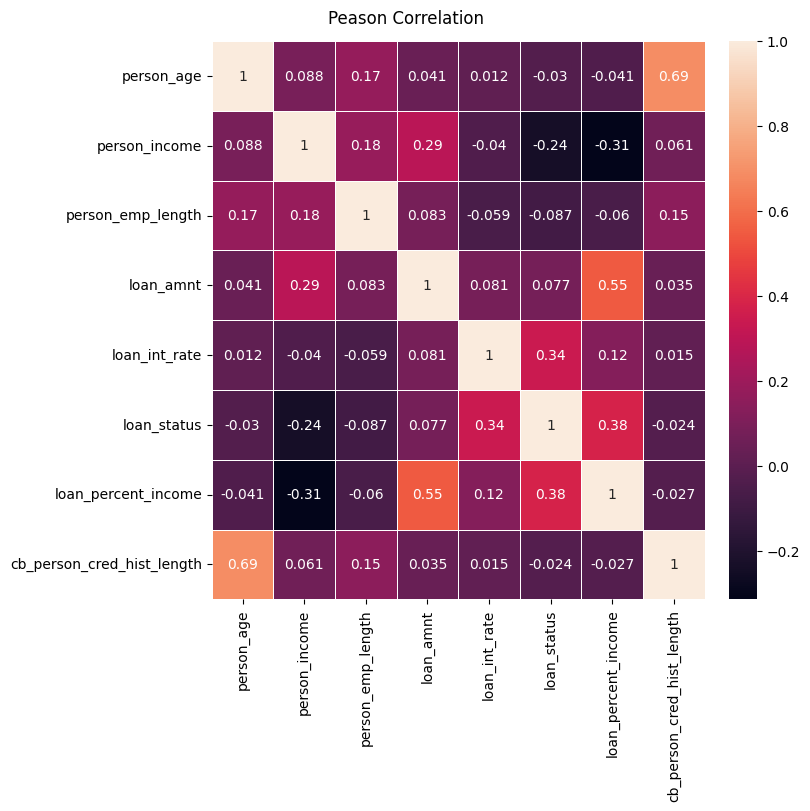

In [ ]:
fig,axs=plt.subplots(figsize=(8,8),constrained_layout=True)
fig.suptitle("Peason Correlation")
ax.set_title('Heat Map')
sns.heatmap(df1.select_dtypes(include=['int64','float64']).corr(),annot=True,linewidth=0.6)

Observations:

  - As the Person Age increse the Loan status is decresing,person Age is inversily propotional to Loan Status.

  - As the Person income increse the Loan status is decresing,person income is inversily propotional to Loan Status.


- As the Loan Amount increases the Loan status income  will increase, The Loan Amount ~ Loan status

- As the Person Age increse the Cb person credit history is incresing,person Age is inversily propotional to Loan Status.


## Which variables are most significant with respect to the target variable?

- Loan Amout,loan_int_rate,loan_percent_income columns are the most significant with Respect to the Target Variable